

# Project: Investigate a Dataset - [No Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

# Dataset Description 

<a id='intro'></a>
## Introduction

> ●This dataset contains information about around 105k medical appointments in Brazil
> 
> ●Dataset is mainly focused whether patients show up for their appointment or not
> 
> ●A punch of characteristics about patients are included in each row.
> 
> ● "ScheduledDay" defines what day the patient set up their appointment.
> 
> ● "Neighborhood" indicates the location of the hospital.
> 
> ● "Scholarship" indicates whether patients are educated or not
> 
> ● in last column "No Show": the answer 'No' means patient showed up to their appointment and 'yes' means they didn't show up

## Question(s) for Analysis

### ●Attendance Ratio

### ●Evaluating features that affect attendance

In [2]:
# w this cell is  to set up import statements for all of the packages that we plan to use.

import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> In this part, we are going to inspect the dataset and examine it's characteristics





## General Properties

In [6]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### There is no Missing Values

In [10]:
# Finding duplicates
df.duplicated().sum()

0

#### There is no duplicated Data

In [11]:
# Data summary
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### There maybe wrong data in "Age" column as Age can't be < 0

In [15]:
# Finding wrong age values
wrong_age = df.query('Age == -1')
wrong_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [16]:
# Number of  unique values for patients
df['PatientId'].nunique()

62299

In [17]:
# Duplicate attendance status for patients
print(df.duplicated(['PatientId', 'No-show']).sum())

38710


<a id='wrangling'></a>
## Data Cleaning

> In this section, we will clean our dataset
 

In [18]:
# Deleting wrong age input
df.drop(index = 99832 , inplace = True)

In [19]:
# Deleting Duplicate attendance status for patients
df.drop_duplicates(['PatientId', 'No-show'] , inplace = True)

In [20]:
# Deleting unnecessary columns
df.drop(['PatientId', 'ScheduledDay','AppointmentDay','AppointmentID'] , axis = 1, inplace = True)

In [21]:
# defining new Data shape
df.shape

(71816, 10)

In [25]:
# Adjusting Columns Names
df.rename(columns = {'Hipertension': 'Hypertension', 'Handcap': 'Handicap','No-show':'attended'}, inplace = True)
# # Editing column "attended" values to be clear
df['attended'] = df['attended'].apply(lambda x : x.replace('No','1'))
df['attended'] = df['attended'].apply(lambda x : x.replace('Yes','0'))
df['attended'] = df['attended'].apply(lambda x : x.replace('1','Yes'))
df['attended'] = df['attended'].apply(lambda x : x.replace('0','No'))

In [26]:
# New Dataframe
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,attended
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [27]:
# New Data summary
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000
mean,36.527501,0.095536,0.195068,0.070959,0.025036,0.020135,0.335566
std,23.378262,0.293956,0.396256,0.256758,0.156236,0.155338,0.472191
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Data Wrangling Overview
1- First of all, we displayed the top 5 rows of the dataset to better understand the dataset

2- secondly, we used displayed info about the whole data and checked the duplicated to know what we should do next but we found no duplicates or missing values 

3- going on, we used df.describe() to get the statistics about the data and try to markup any errors that needed to be corrected

4-then, a wrong "age" entry & a number of duplicated 'patient id' were needed to be taken off

5- after that, we started cleaning the data by dropping of (Wrong age entry / duplicated Id's / unimportant data columns

6- finally we checked the new dataframe to confirm that we cleaned and trimed the dataset successfully using functions like :
df.shape/df.head()/df.describe()



#### And now our Dataset is now ready to be analyzed

<a id='eda'></a>
## Exploratory Data Analysis

> after cleaning our dataset,we are now ready to explore it and find necessary stats and visualize them to address the needed questions and go through the data analysis process


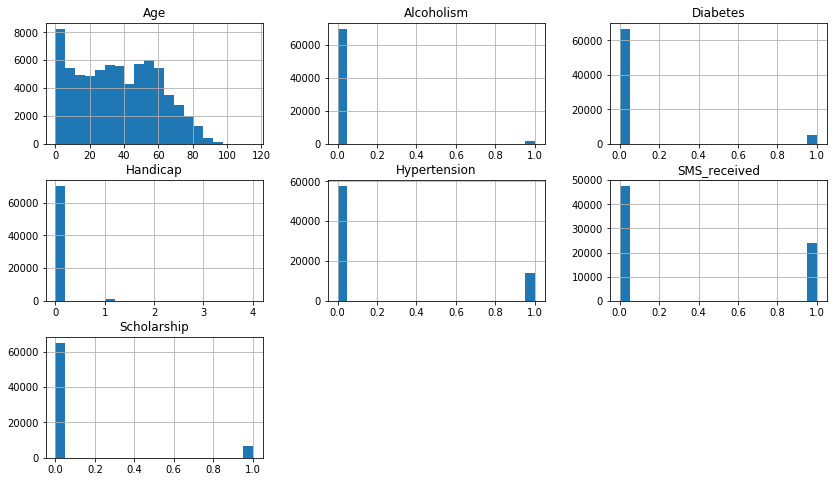

In [28]:
df.hist(figsize=(14,8) , bins = 20);

### Q1: Attendance Rate

In [30]:
# getting counts
attended = df.attended == 'Yes'
not_attended = df.attended == 'No'
pd.DataFrame([df[attended].count() , df[not_attended].count()] , index=['attended' , 'not_attended'])

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,attended
attended,54153,54153,54153,54153,54153,54153,54153,54153,54153,54153
not_attended,17663,17663,17663,17663,17663,17663,17663,17663,17663,17663


In [31]:
# Calculating Averages 
pd.DataFrame([df[attended].mean() , df[not_attended].mean()] , index=['attended' , 'not_attended'])

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
attended,37.229166,0.091334,0.202944,0.072868,0.02360,0.020904,0.297232
not_attended,34.376267,0.108419,0.170922,0.065108,0.02944,0.017777,0.453094


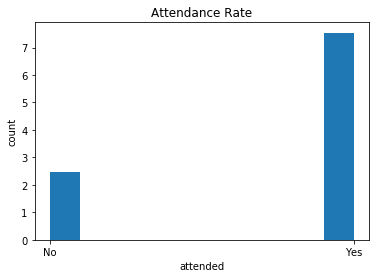

In [32]:
#plotting attendace rate
plt.hist( df['attended'] ,density = 1) 
plt.xlabel('attended')
plt.ylabel('count')
plt.title('Attendance Rate')
plt.show()

### It seems that patients are committed and attendace rate is high 


### Now let's evaluate features that affect attendance

In [52]:
# Creating the repeated Function to visualize the factors affecting the attendace
def factors_visuals (column):
    df[column][attended].hist(alpha=0.6, bins=20, color='red', label= 'attended' , figsize = (14,8))
    df[column][not_attended].hist(alpha=0.6, bins=20, color='blue', label= 'not_attended' , figsize = (14,6))
    plt.xlabel(f"{column}", fontsize = 18)
    plt.ylabel('Num. of patients' , fontsize = 18)
    plt.title("{} Impact On Attendance  Rate".format(column))
    plt.legend(); 


### Q2: Evaluating Gender impact on attendance rate

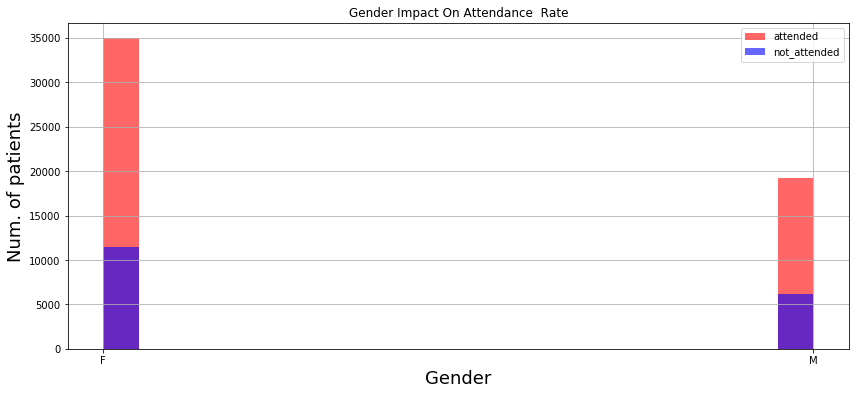

In [53]:
factors_visuals('Gender')

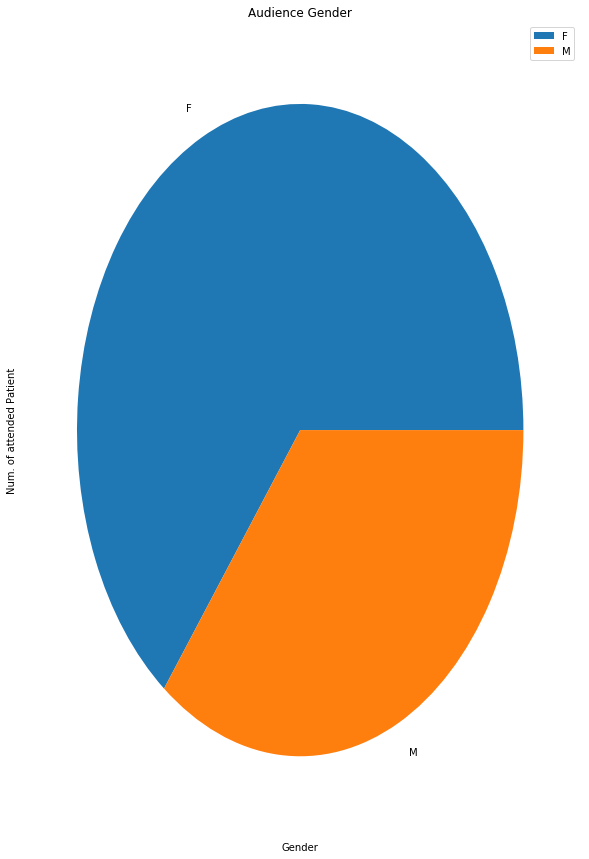

In [54]:
# How many males&females have attended?
df['Gender'][attended].value_counts().plot(kind='pie' , figsize = (10,15))
plt.ylabel("Num. of attended Patient")
plt.xlabel("Gender")
plt.title("Audience Gender")
plt.legend();

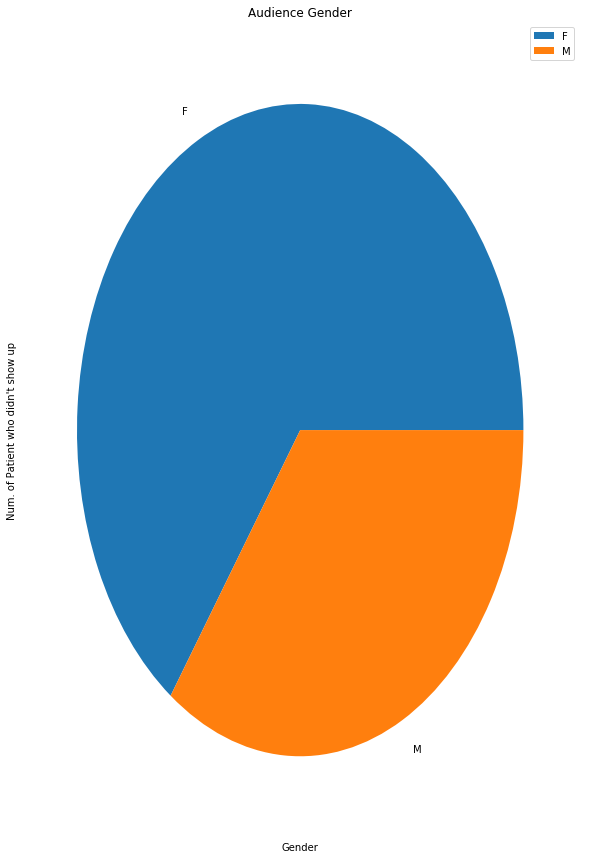

In [55]:
# How many males&females have not attended?
df['Gender'][not_attended].value_counts().plot(kind='pie' , figsize = (10,15))
plt.ylabel("Num. of Patient who didn't show up")
plt.xlabel("Gender")
plt.title("Audience Gender")
plt.legend();

### Gender has no obvious effect on attendance rate


### Q3: Evaluating age impact on attendance rate

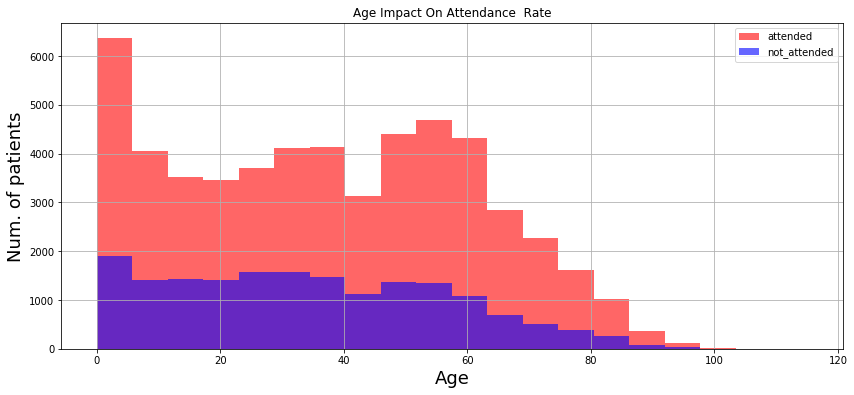

In [56]:
factors_visuals('Age')

### Young people tend to be more committed than elders

### Q4: Evaluating 'Neighbourhood' impact on attendance rate

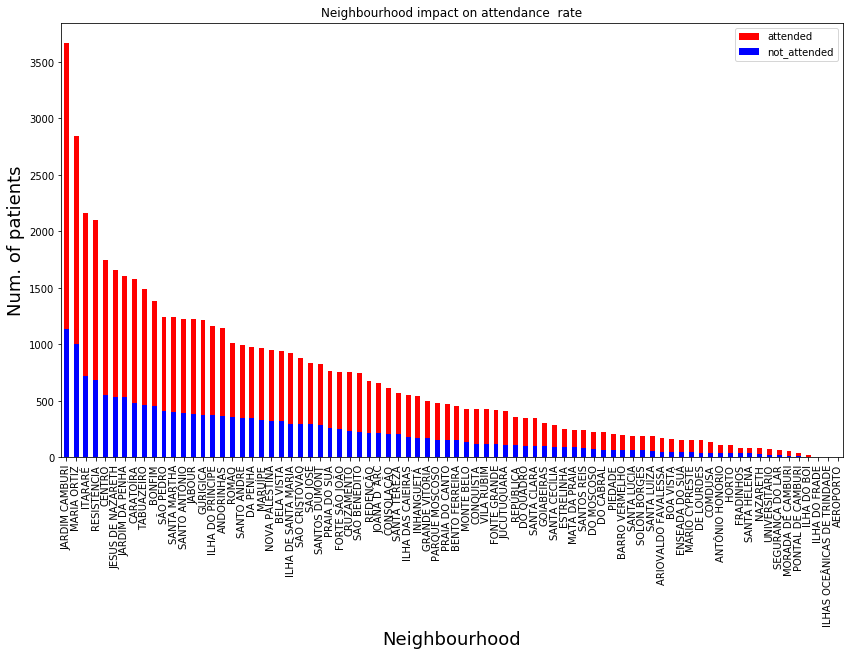

In [57]:
df['Neighbourhood'][attended].value_counts().plot(kind = 'bar' ,color='red', label= 'attended' , figsize = (14,8))
df['Neighbourhood'][not_attended].value_counts().plot(kind = 'bar' ,color='blue', label= 'not_attended' , figsize = (14,8))
plt.xlabel('Neighbourhood', fontsize = 18)
plt.ylabel('Num. of patients' , fontsize = 18)
plt.title('Neighbourhood impact on attendance  rate')
plt.legend();

### Patient's place of residence has a great impact on whether they show up to their oppintments or no

### Q5: Evaluating 'Scholarship' impact on attendance rate

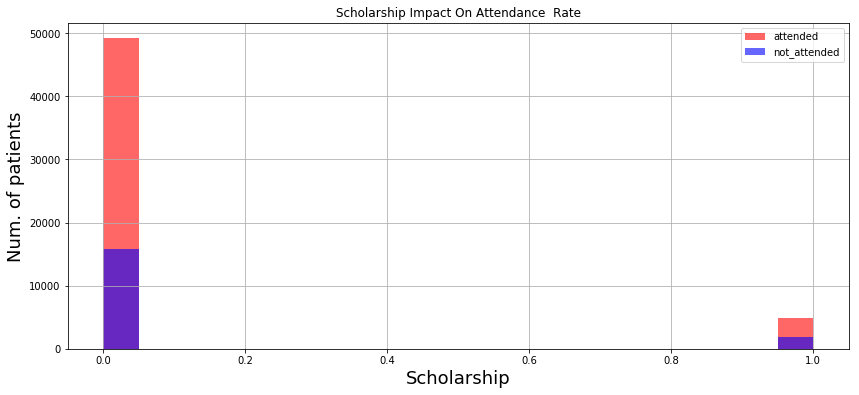

In [58]:
factors_visuals('Scholarship')

### Scholarship has no impact on attendance rate

### Q6: Evaluating diseases (Hypertension &  Diabetes)along with Age impact on attendance rate

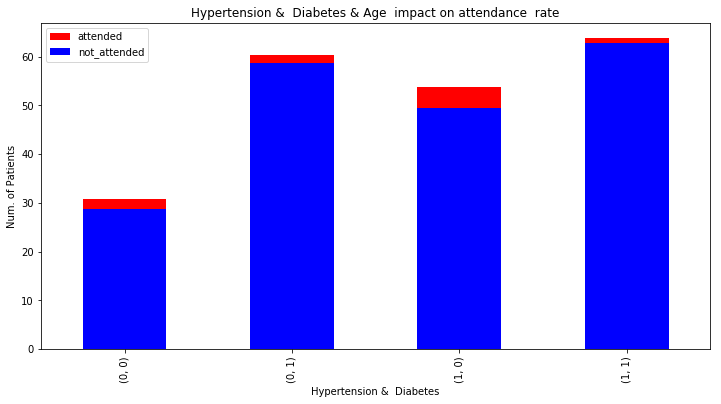

In [59]:
df[attended].groupby(['Diabetes','Hypertension']).mean()['Age'].plot(kind='bar', color='red', label= 'attended', figsize = (12,6))
df[not_attended].groupby(['Diabetes','Hypertension']).mean()['Age'].plot(kind='bar', color='blue', label= 'not_attended', figsize = (12,6))
plt.xlabel('Hypertension &  Diabetes')
plt.ylabel('Num. of Patients')
plt.title('Hypertension &  Diabetes & Age  impact on attendance  rate')
plt.legend();

### Hypertension & Diabetes don't have a clear impact on attendance rate

### Q7: Evaluating Alcoholism impact on attendance rate

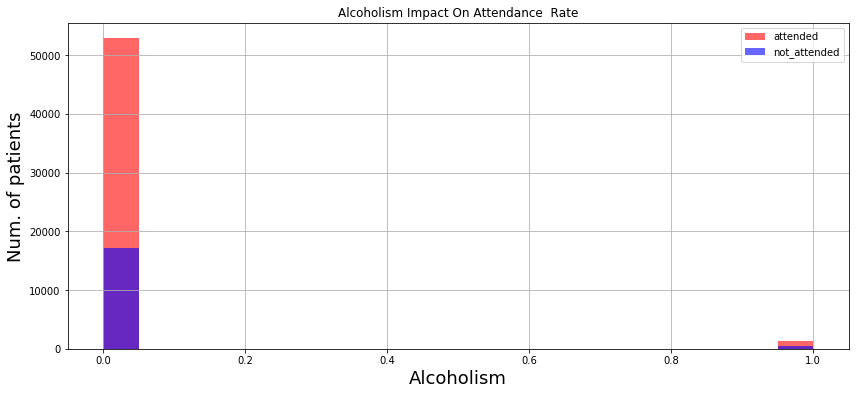

In [60]:
factors_visuals('Alcoholism')

### Alcoholism has no clear impact on attendance rate

### Q8: Evaluating ''Notifying patients by sms'' impact on attendance rate

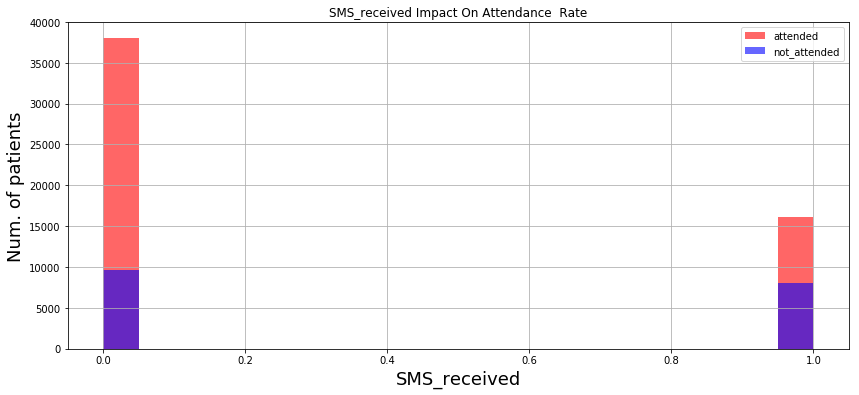

In [61]:
factors_visuals('SMS_received')

### As per the graph :Messaging patients to remind them about their appointment doesn't impact attendance rate in a positive way 

<a id='conclusions'></a>
# Conclusion

#### Regaring this Dataset :

****
##### 1• It seems that patients are committed and attendace rate is high 

##### 2• Gender has no obvious effect on attendance rate

##### 3• Young people tend to be more committed than elders

##### 4• Patient's place of residence has a great impact on whether they show up to their oppintments or no

##### 5• Scholarship has no impact on attendance rate

##### 6• Diseases like: Hypertension & Diabetes don't have a clear impact on attendance rate

##### 7• Alcoholism has no clear impact on attendance rate

##### 8• Messaging patients to remind them about their appointment doesn't impact attendance rate in a positive way
****


<a id='Limitation'></a>
## Limitation

##### 1- Maybe the missing values would have helped to get a better overview of the dataset

##### 2- Factors like (Employment / Medical Insurance / Monthly profit or Yearly income) would have helped to perform a better analysis indeed

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0